In [20]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [22]:

train_dir = '/content/drive/MyDrive/dataset_train'
test_dir = '/content/drive/MyDrive/dataset_test'
test_dir2 = '/content/drive/MyDrive/datasetMe'
cam_dir = '/content/drive/MyDrive/CAM_test'
fer_dir = '/content/drive/MyDrive/FER-2013test'

In [23]:
path_224 = "/content/drive/MyDrive/model/MobileNetV2_224_0.78.h5"

In [24]:
import tensorflow as tf
model = tf.keras.models.load_model(path_224)
print(f"Model loaded from: {path_224}")
print(f"Expected input shape: {model.input_shape}")
pixel = model.input_shape[2]
print(f"Expected input size: {pixel}")
color = model.input_shape[3]
model.summary()

Model loaded from: /content/drive/MyDrive/model/MobileNetV2_224_0.78.h5
Expected input shape: (None, 224, 224, 3)
Expected input size: 224


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,435,785 (9.29 MB)

 Trainable params: 175,239 (684.53 KB)

 Non-trainable params: 2,260,544 (8.62 MB)

 Optimizer params: 2 (12.00 B)

In [25]:
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize the data generator for normalization
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Create the test data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(pixel, pixel),
    color_mode='rgb' if color == 3 else 'grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Map class indices to labels
class_indices = test_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}

# Initialize accuracy counters
correct_per_class = np.zeros(len(class_labels))
total_per_class = np.zeros(len(class_labels))

# Evaluate each batch
for batch_images, batch_labels in test_generator:
    batch_images = np.expand_dims(batch_images, axis=-1)
    predictions = model.predict(batch_images)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(batch_labels, axis=1)
    for true, pred in zip(true_classes, predicted_classes):
        total_per_class[true] += 1
        if true == pred:
            correct_per_class[true] += 1
    if test_generator.batch_index == 0:
        break

# Calculate per-class accuracy
accuracy_per_class = correct_per_class / total_per_class

# Print per-class accuracy
print("Per-class Accuracy:")
for class_idx, accuracy in enumerate(accuracy_per_class):
    print(f"{class_labels[class_idx]}: {accuracy * 100:.2f}%")

# Generate and print classification report
true_labels = test_generator.classes
predicted_labels = np.argmax(model.predict(test_generator), axis=1)
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_labels.values()))


Found 28 images belonging to 7 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Per-class Accuracy:
angry: 75.00%
disgust: 75.00%
fear: 75.00%
happy: 75.00%
neutral: 100.00%
sad: 50.00%
suprise: 100.00%


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step

Classification Report:
              precision    recall  f1-score   support

       angry       0.75      0.75      0.75         4
     disgust       0.60      0.75      0.67         4
        fear       0.75      0.75      0.75         4
       happy       1.00      0.75      0.86         4
     neutral       0.67      1.00      0.80         4
         sad       1.00      0.50      0.67         4
     suprise       1.00      1.00      1.00         4

    accuracy                           0.79        28
   macro avg       0.82      0.79      0.78        28
weighted avg       0.82      0.79      0.78        28



In [26]:
from tensorflow.keras.models import load_model
import tensorflow as tf

# Load the pre-trained model
model = tf.keras.models.load_model(path_224)

# Extract input image size
pixel = model.input_shape[2]

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Test the model with a dummy input
dummy_input = tf.random.normal((1, pixel, pixel, 3))  # Create a random input tensor
output = model(dummy_input)  # Pass the input through the model

# Print input and output shapes
print("Model input shape:", model.input_shape)
print("Model output shape:", model.output_shape)
print("Output shape after passing dummy input:", output.shape)


Model input shape: (None, 224, 224, 3)
Model output shape: (None, 7)
Output shape after passing dummy input: (1, 7)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


<ipython-input-27-0530a1bb653f>:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap("jet")


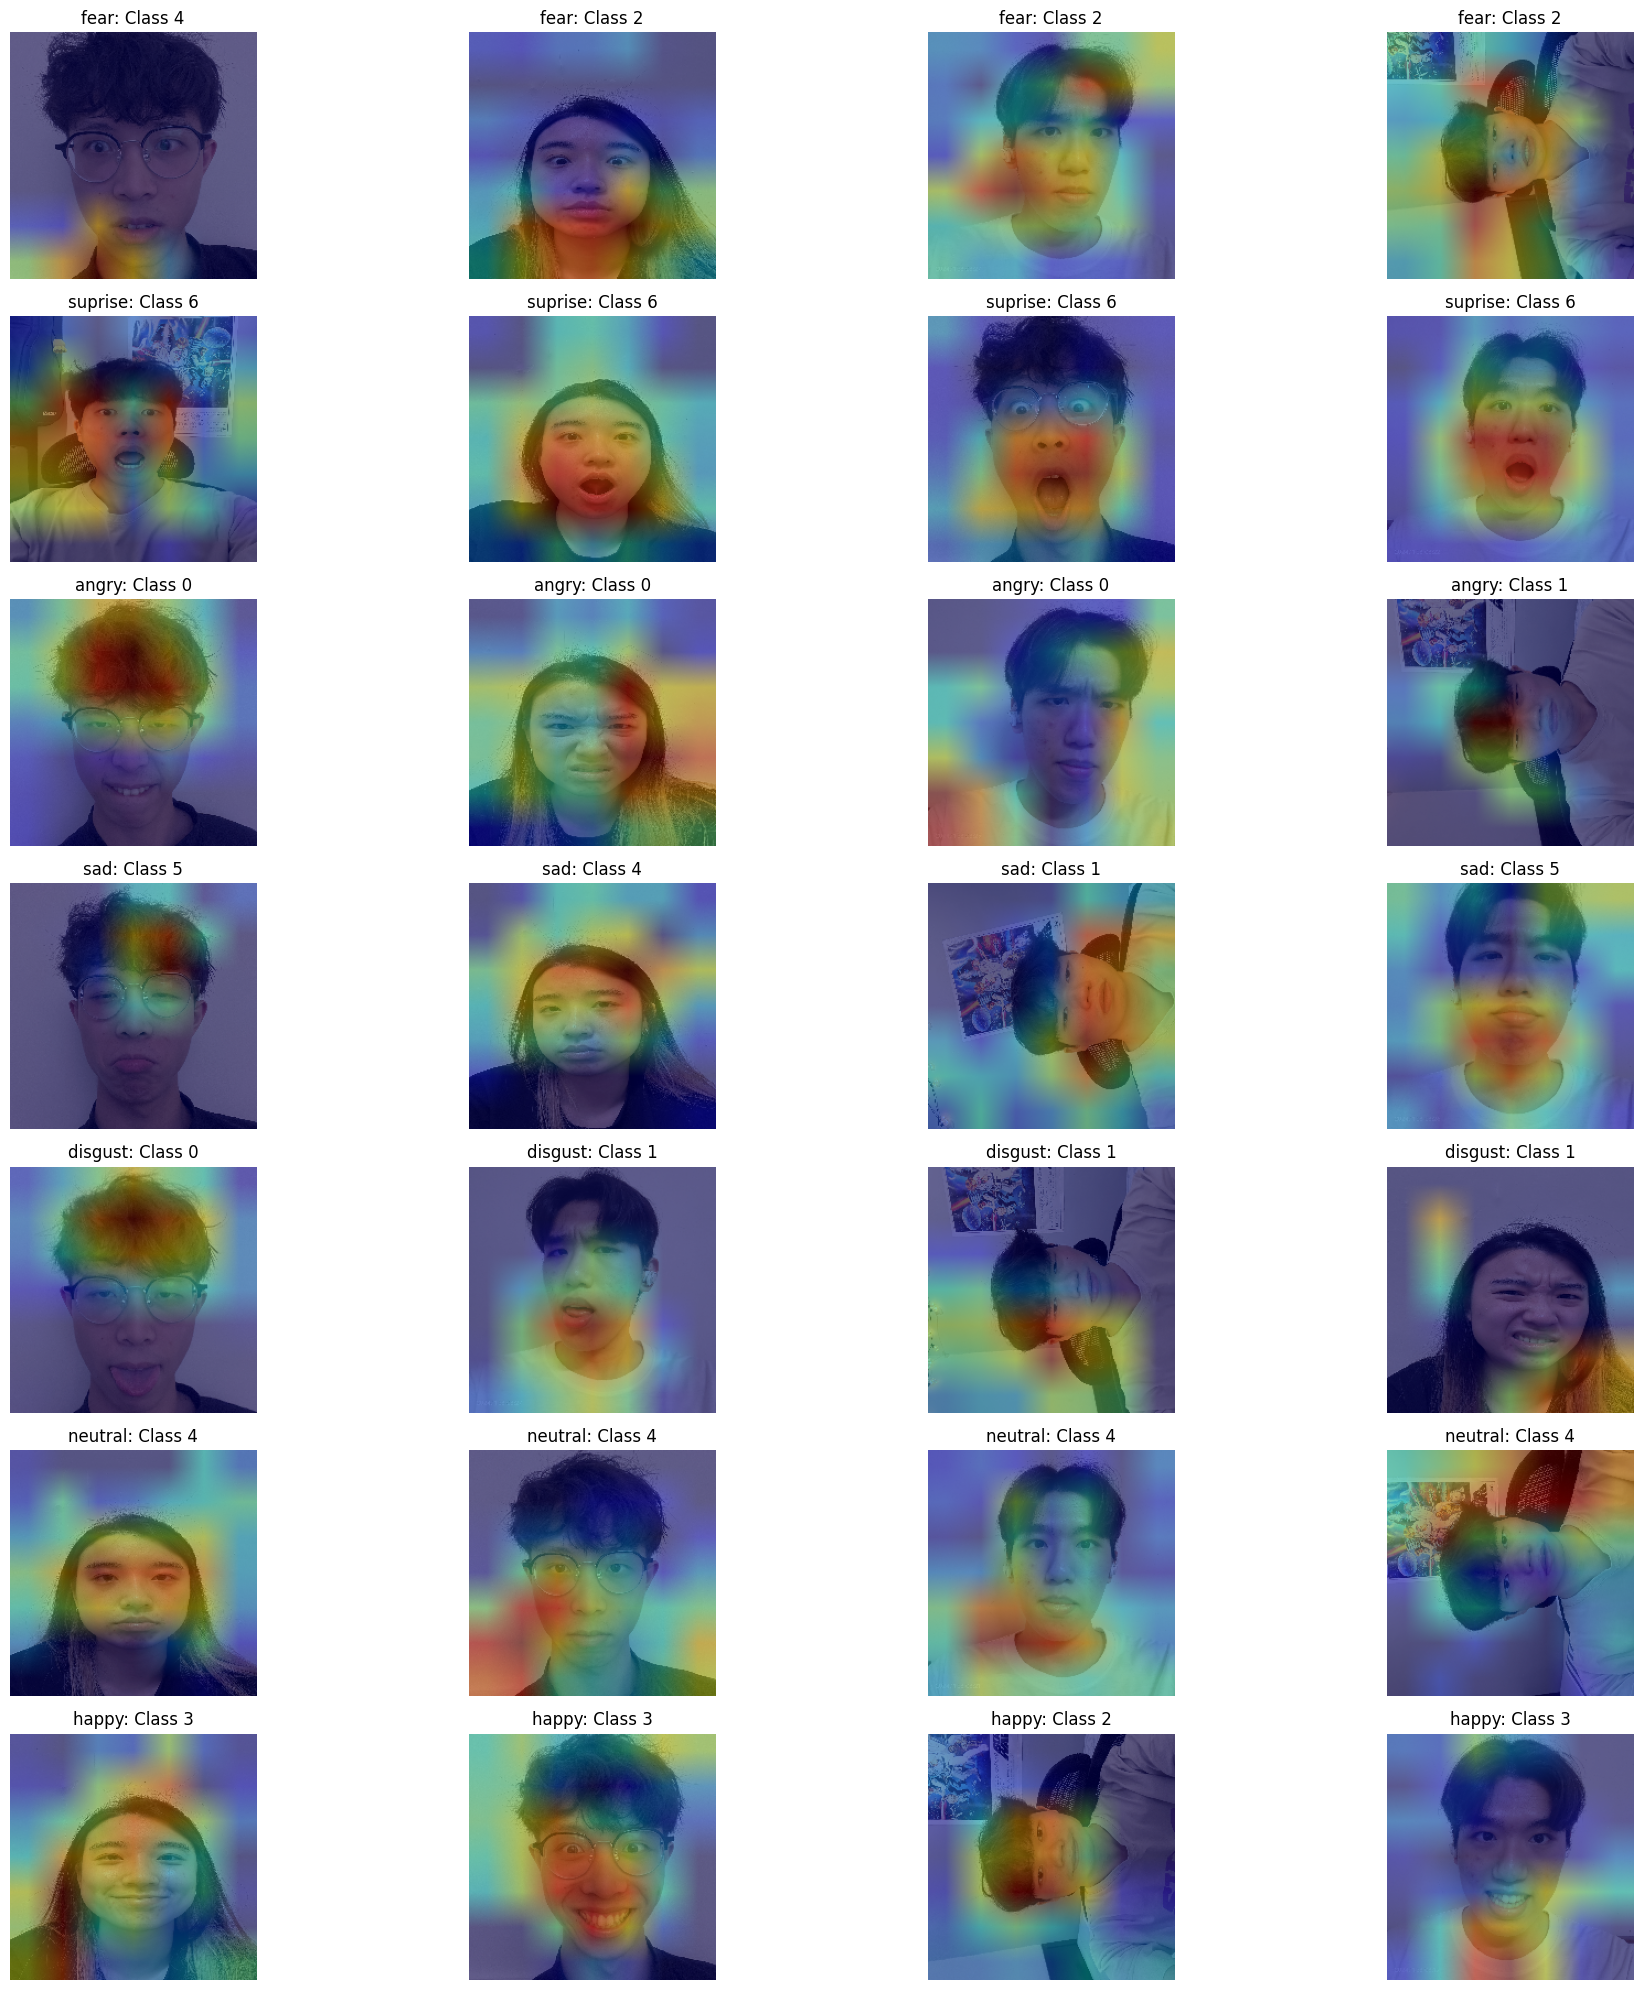

In [27]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Initialize model with dummy input
dummy_input = np.random.random((1, 224, 224, 3)).astype(np.float32)
_ = model.predict(dummy_input)

# Grad-CAM function
def grad_cam(model, image, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        inputs=model.input,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap, tf.argmax(predictions[0]).numpy()

# Generate Grad-CAM overlay
def generate_grad_cam_image(original_image, heatmap, alpha=0.4, darkness=0.4):
    heatmap = np.uint8(255 * heatmap)
    jet = plt.cm.get_cmap("jet")
    jet_heatmap = jet(np.arange(256))[:, :3][heatmap]
    jet_heatmap = tf.image.resize(jet_heatmap, (original_image.shape[0], original_image.shape[1]))
    darkened_image = original_image * darkness
    superimposed_img = jet_heatmap * alpha + darkened_image / 255.0
    return tf.clip_by_value(superimposed_img, 0, 1).numpy()

# Display Grad-CAM results in a grid
def display_images_in_grid(base_folder, model, last_conv_layer_name, grid_size=(4, 4)):
    subfolders = [os.path.join(base_folder, subfolder) for subfolder in os.listdir(base_folder) if os.path.isdir(os.path.join(base_folder, subfolder))]
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(20, 20))
    axes = axes.ravel()
    img_count = 0
    for subfolder in subfolders:
        for img_name in os.listdir(subfolder):
            if img_name.endswith(('.jpg', '.JPG', '.png', '.PNG')):
                img_path = os.path.join(subfolder, img_name)
                img = load_img(img_path, target_size=(224, 224))
                img_array = np.expand_dims(img_to_array(img), axis=0) / 255.0
                heatmap, pred_index = grad_cam(model, img_array, last_conv_layer_name)
                grad_cam_image = generate_grad_cam_image(img_to_array(img).astype(np.uint8), heatmap)
                axes[img_count].imshow(grad_cam_image)
                axes[img_count].set_title(f"{os.path.basename(subfolder)}: Class {pred_index}")
                axes[img_count].axis('off')
                img_count += 1
                if img_count >= grid_size[0] * grid_size[1]:
                    break
        if img_count >= grid_size[0] * grid_size[1]:
            break
    plt.tight_layout()
    plt.show()

# Parameters
base_folder = test_dir
last_conv_layer_name = "Conv_1"

# Run Grad-CAM visualization
display_images_in_grid(base_folder, model, last_conv_layer_name, grid_size=(7, 4))
